In [37]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Data Sample

In [38]:
n_samples = 100
n_features = 1

In [39]:
X_numpy, Y_numpy = make_regression(n_samples, n_features, noise=20, random_state=1)

# Numpy to Torch

In [40]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) # Reshape Tensor

epoch: 10 => loss: 4362.32177734375
epoch: 20 => loss: 3256.966796875
epoch: 30 => loss: 2456.599853515625
epoch: 40 => loss: 1876.4820556640625
epoch: 50 => loss: 1455.6090087890625
epoch: 60 => loss: 1150.00341796875
epoch: 70 => loss: 927.918701171875
epoch: 80 => loss: 766.410400390625
epoch: 90 => loss: 648.8763427734375
epoch: 100 => loss: 563.2906494140625


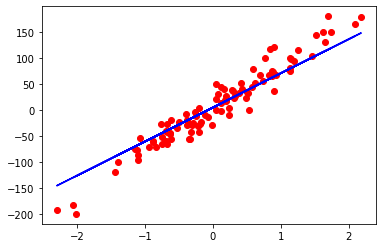

In [41]:
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

epochs = 100

for epoch in range(epochs):
    Y_pred = model(X)

    l = loss(Y, Y_pred)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()
    if (epoch+1) %10 == 0:
        print(f'epoch: {epoch+1} => loss: {l.item()}')
Y_pred = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, Y_pred, 'b')
plt.show()

# Liner Regression

In [55]:
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target

n_samples, n_features = X.shape

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

In [60]:
Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0], 1)

In [72]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super(LogisticRegression, self).__init__()
        self.liner = torch.nn.Linear(n_input, n_output)

    def forward(self, X):
        return torch.sigmoid(self.liner(X))

model = LogisticRegression(n_features, 1)

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    Y_pred = model(X_train)

    loss = loss_fn(Y_pred, Y_train)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) %1 == 0:
        print(f'epoch: {epoch+1} => loss: {loss.item()}')

epoch: 1 => loss: 0.589555561542511
epoch: 2 => loss: 0.5783028602600098
epoch: 3 => loss: 0.567581832408905
epoch: 4 => loss: 0.5573579668998718
epoch: 5 => loss: 0.547599732875824
epoch: 6 => loss: 0.5382774472236633
epoch: 7 => loss: 0.5293639302253723
epoch: 8 => loss: 0.5208339095115662
epoch: 9 => loss: 0.5126637816429138
epoch: 10 => loss: 0.5048320293426514
epoch: 11 => loss: 0.4973183870315552
epoch: 12 => loss: 0.49010419845581055
epoch: 13 => loss: 0.48317214846611023
epoch: 14 => loss: 0.4765060245990753
epoch: 15 => loss: 0.47009098529815674
epoch: 16 => loss: 0.4639129936695099
epoch: 17 => loss: 0.45795926451683044
epoch: 18 => loss: 0.4522174894809723
epoch: 19 => loss: 0.4466765820980072
epoch: 20 => loss: 0.44132599234580994
epoch: 21 => loss: 0.43615594506263733
epoch: 22 => loss: 0.4311572015285492
epoch: 23 => loss: 0.42632120847702026
epoch: 24 => loss: 0.4216401278972626
epoch: 25 => loss: 0.41710615158081055
epoch: 26 => loss: 0.4127123951911926
epoch: 27 => los

In [75]:
with torch.no_grad():
    Y_pred = model(X_test)
    Y_pred = Y_pred.round()
    acc = Y_pred.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f"Test Accuracy: {acc}")

Test Accuracy: 0.9649122953414917
